In [ ]:
import sys
import math
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def main(argv):

 default_file = '123.jpg'
 filename = argv[0] if len(argv) > 0 else default_file

 src = cv.imread(cv.samples.findFile("/content/123.jpg"), cv.IMREAD_GRAYSCALE)

 if src is None:
  print('Error opening image!')
  print('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
  return -1

 dst = cv.Canny(src, 50, 200, None, 3)
 cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
 cdstP = np.copy(cdst)

 lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

 if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


 linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

 if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

 cv2_imshow(src)
 print("Converted GrayScale image")
 cv2_imshow(cdst)
 print("")
 cv2_imshow(cdstP)

 cv.waitKey()
 return 0


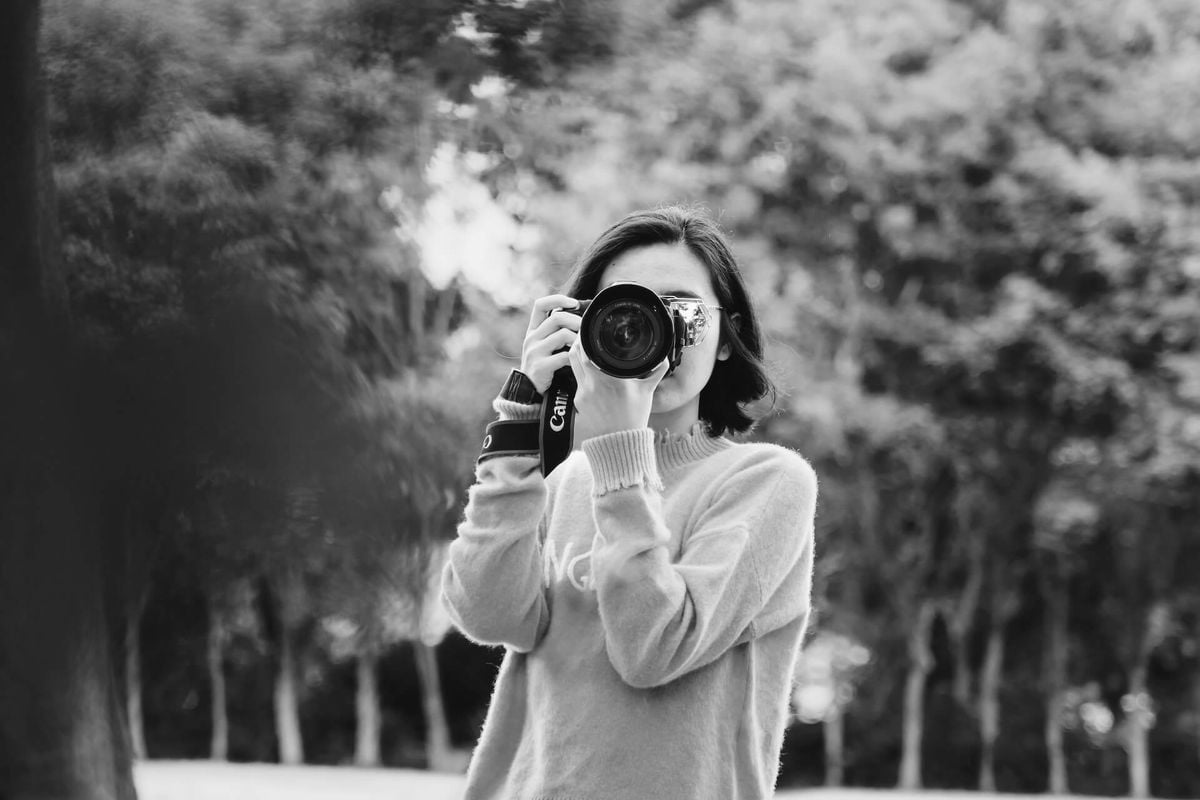

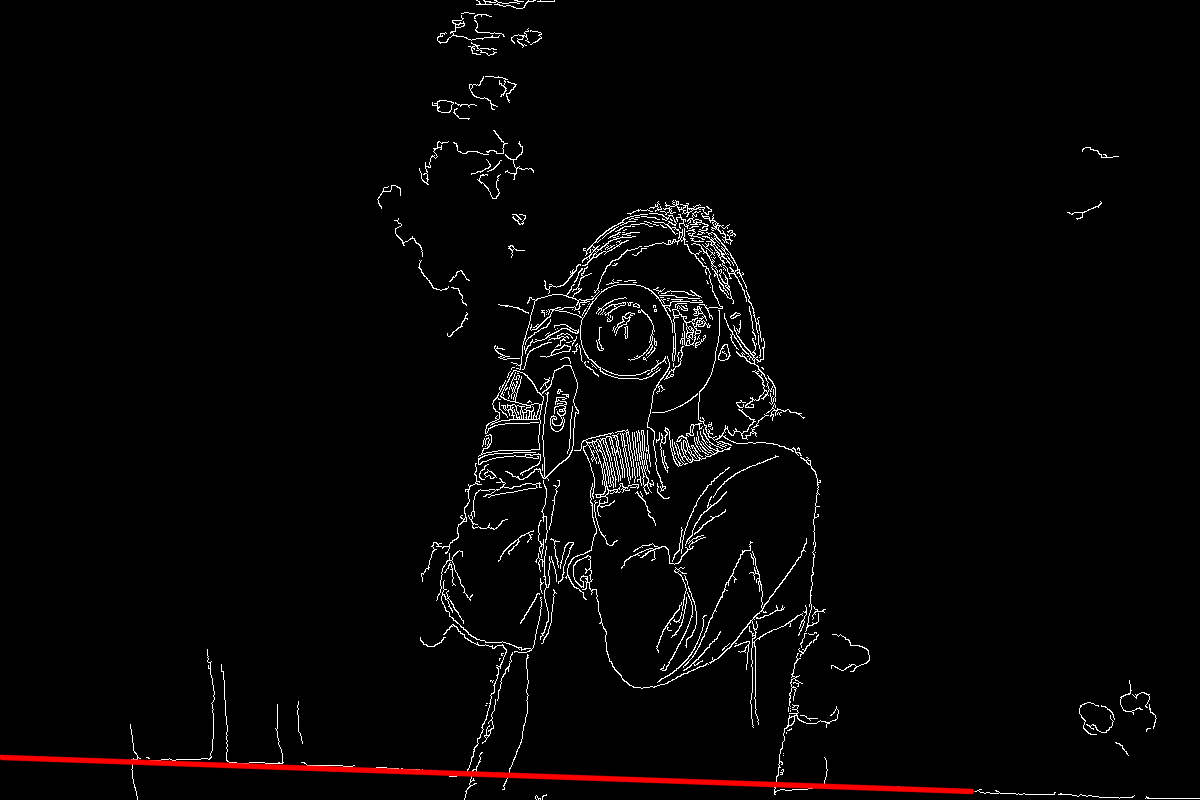

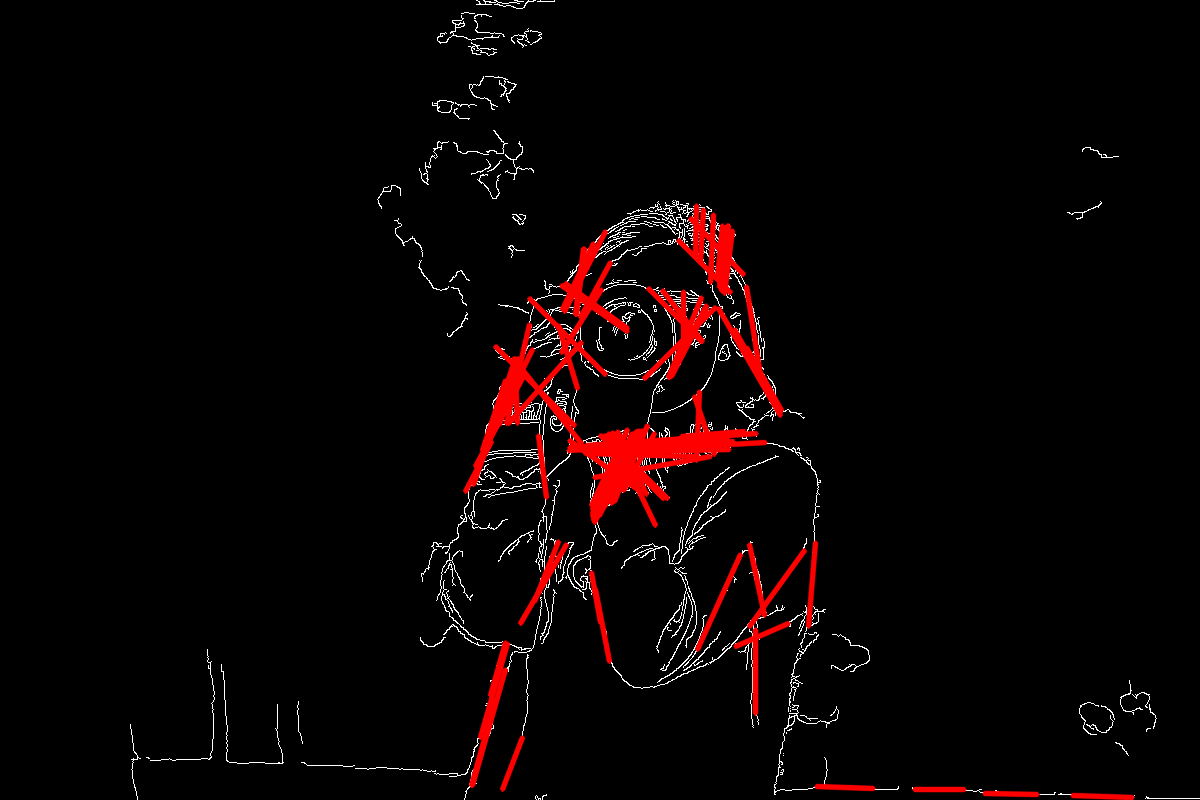

In [ ]:
if __name__ == "__main__":
 main(sys.argv[1:])

# Corner Detection

In [ ]:
img = cv2.imread('123.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
gray = np.float32(gray)

In [ ]:
dst = cv2.cornerHarris(gray,2,3,0.04)

dst = cv2.dilate(dst,None)

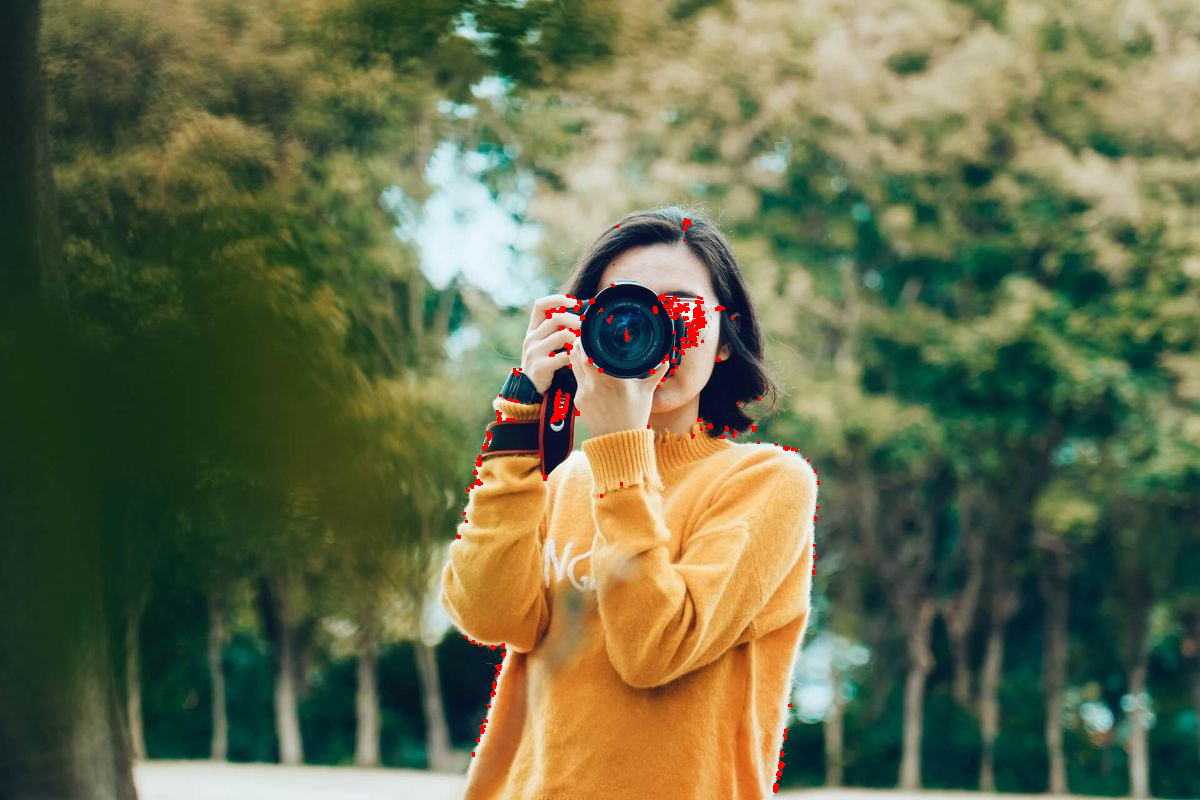

In [ ]:
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)